**Lists: append() and insert()**
-----

**Append**

In [2]:
class ListAppendTest:
    def __init__(self, n):
        self.data = list([1]*n)
        self.n = n

    def run(self):
        self.data.append(42)

**Insert in the middle**

In [3]:
class ListInsertTest:
    def __init__(self, n):
        self.data = list([1]*n)
        self.n = n

    def run(self):
        self.data.insert(int(self.n/2), 42)

-----
**Timing**

In [4]:
import timeit
import time
import numpy as np

def my_time(Test, n=25000, T=1000):
    
    tests = [Test(n) for _ in range(0, T)]
    
    results = [timeit.timeit(tests[i].run, 
                             number=1, 
                             timer=time.process_time) for i in range(0, T)]

    print("{0:3.2f} ± {1:3.2f} usec per loop".format(np.mean(results)*1e6,
                                                   np.std(results)*1e6))

In [5]:
my_time(ListAppendTest)
my_time(ListInsertTest)

1.58 ± 0.27 usec per loop
15.96 ± 2.28 usec per loop


------
**Plotting dependence on n**

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plot_time_vs_n(Test, N = 50000, T = 20):
    xxx = []
    yyy = []
    for n in range(N//10, N, 500):
        tests = [Test(n) for _ in range(0, T)]
        t1 =  time.process_time()
        for i in range(0, T):
            tests[i].run()
        t2 =  time.process_time()
        xxx.append(n)
        yyy.append((t2-t1)/T*1e6)
    
    plt.xlabel("n")
    plt.ylabel("time / usec")
    return plt.plot(xxx, yyy)

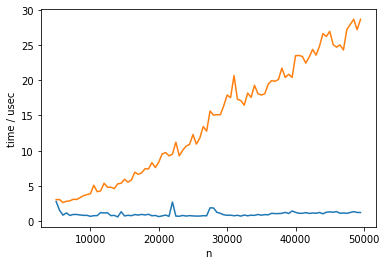

In [9]:
plot_time_vs_n(ListAppendTest);
plot_time_vs_n(ListInsertTest);

Conclusion
---

**Append**  
Usually doesn't need to move aroud existing elements of the list in memory.  
Takes amortized constant time O(1).

**Insert in the middle**  
Has to move half on the existing elements of the list in memory.  
Time depends linearely on the length _n_ of the list, O(_n_).